In [ ]:
%reset

# Assignment 4 Question 1

In [ ]:
# Importing Some Libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
aSAH = pd.read_csv('aSAH.csv')
with pd.option_context('display.max_rows',None,'display.max_columns',None):
  print(aSAH)

In [ ]:
sns.histplot(data=aSAH,x='s100b',hue='outcomeA',kde=True,bins=20)
plt.legend(labels=["Good","Poor"])

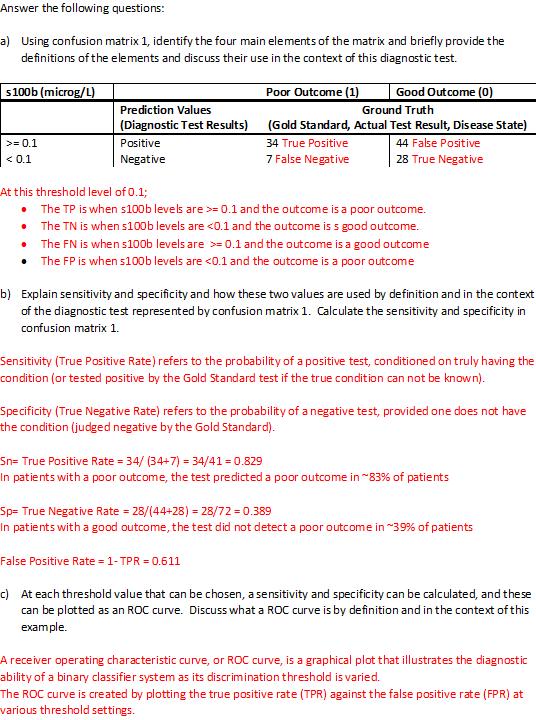

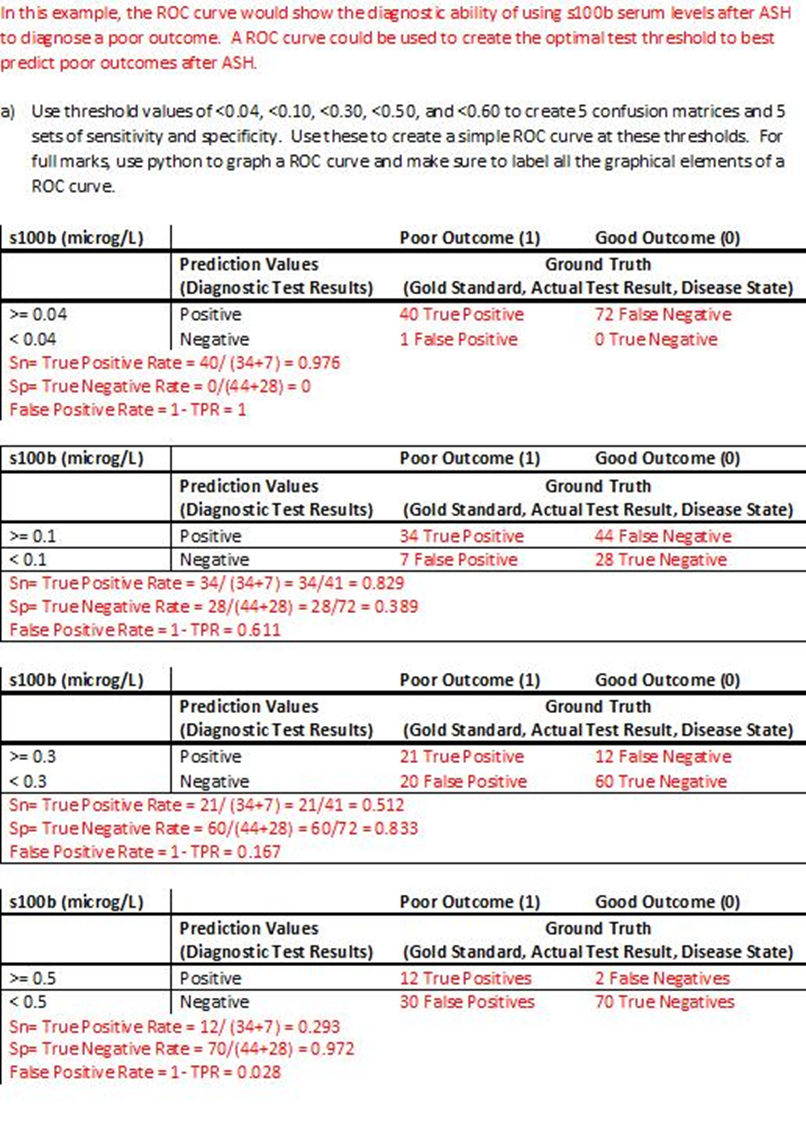

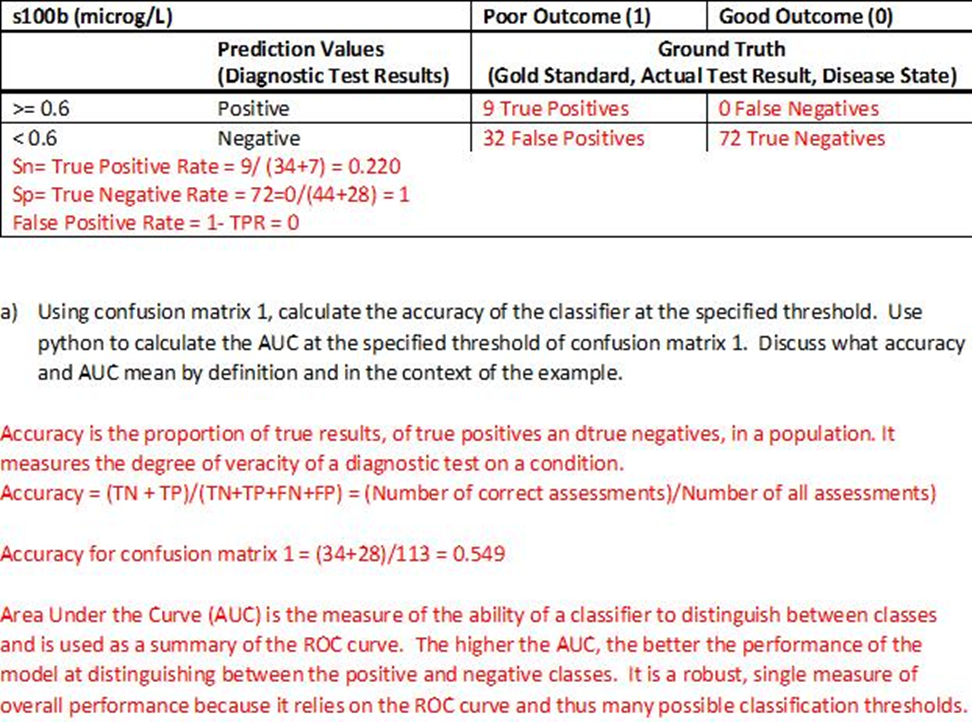

In [ ]:
auc_1score= metrics.auc([0,0.611,1],[0,0.83,1])
print(auc_1score)

In [ ]:
# plot the ROC curve at this confusion matrix 1 threshold
TPR=np.array([1,0.829,0])
FPR=np.array([1,0.611,0])
ax=sns.scatterplot(x=FPR,y=TPR,color='r')
ax=sns.lineplot(x=FPR,y=TPR)
ax.axline([0,0],[1,1],linestyle=':',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')

# Plot the ROC cure at the 5 specified thresholds

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
TPR=np.array([1,0.976,0.829,0.512,0.293,0.220,0])
FPR=np.array([1,1,0.611,0.167,0.028,0,0])
ax=sns.scatterplot(x=FPR,y=TPR,color='r')
ax=sns.lineplot(x=FPR,y=TPR)
ax.axline([0,0],[1,1],linestyle=':',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')

# Use python roc_curve librarie to more easily work with ROC curves

In [ ]:
fpraSAH,tpraSAH,th= roc_curve(aSAH['outcomeA'],aSAH['s100b'])
print(fpraSAH)
print(tpraSAH)
print(th)
plt.plot((fpraSAH),(tpraSAH),'bo')

In [ ]:
roc_aucaSAH= metrics.auc(fpraSAH,tpraSAH)
display=RocCurveDisplay(fpr=fpraSAH,tpr=tpraSAH,roc_auc=roc_aucaSAH)
display.plot()
plt.plot([0,1],[0,1],linestyle=':')

In [ ]:
# overall AUC
print(roc_aucaSAH)

# Question 2: Chi square test for independence

In [ ]:
from scipy.stats import chi2_contingency
obs=np.array([[63,50],[75,40]])
chi2_contingency(obs,correction=False)

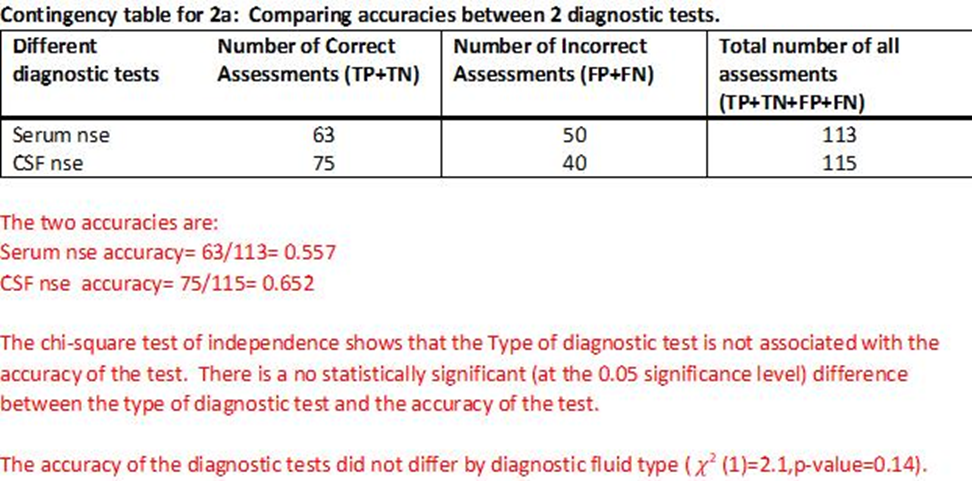

# Question 3 Simple Linear Regression

Assumptions: LINE
L:  Linear relationship assumed.  The mean of the response varaibles in a linear combination of the parameters (regression coefficients) and predcitor variables.  Models have to be linear in the parameters. 

I:  Independence of residuals:  Observations are independent of each other. Errors should be uncorrealted (No autocorrelation) which can often occur with time series data or other dependent datasets.  

N:  Normality:  Normal distribution of the residuals.  The resdiuals have a normal distribution conditional of the regressors (predictors).   

E:  Equal variance of the residuals.  This equality of the variance of the residuals is also called homoscedasticity.  The variance of the residuals is the same for any value of the predictor.

In [ ]:
estriol = pd.read_csv('Birthweight_Estriol.csv')
print(estriol)

Part 2:  Fit the simple linear regression model and check resdiual behavior for assumption review

In [ ]:
sns.scatterplot(x='Estriol',y='Birthweight',data=estriol)

In [ ]:
sns.regplot(x='Estriol',y='Birthweight',data=estriol)

In [ ]:
from statsmodels.formula.api import ols

model1=ols('Birthweight~Estriol',data=estriol)
results1=model1.fit()
print(results1.summary2())

In [ ]:
# Look at residual versus predictor plot and sccatterplots

import statsmodels.api as sm

fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results1,'Estriol',fig=fig)

* Linearity assumption appears weak but with no clear pattern in the resdidual plot to indicate a problem.  
* Independence of errors review of esiudals shows not signs of a clear pattern and no concert for time series correlation.
* No concern with constant variance of error terms: no cone or funnel shape in the residual plot
* Error terms normal:  no indication from resiudal plot that there is a problem for this.  There is a random spread of the error above and below the 0 line on the residual plot.  No concerns for outliers.  But will check with a q-q plot as well.  This plot looks good with the resdiuals behaving along the normal line.  Can also test these with a Shapiro-Wilk test for normality (which shoss that we cannot reject the null hypothesis of normality)

The scatterplots show a weak, positive linear assocaition where brithweight incresaes with increaing estriol level. 

In [ ]:
sm.qqplot(results1.resid,line='s')
plt.show()

In [ ]:
import scipy
from scipy import stats

stats.shapiro(results1.resid)

# Part d and e) Covariance and Correlation

In python the covariance matrix can be found using np.cov, where the variances are the main diagonal and the covaraince is the other diagonal. 

Correlation (Pearson's correlation coefficient = r) is the scaled covariance, and defines the co-relationship between the two variables or how linearly related they are to each other. It is equal to the covaraince divided by the product of the standard deviations.

Scipy will provide the Pearson's r, and will return the correaltion coefficient and the p-value for testing non-correaltion. The p-value (2-sided) indicates the probability of an uncorrelated system producing datasets that have a r at least as extreme as the one computed from the data. 

Significant p-value associated with r.  There is an association between the two variables which is linear and postive. The strength of this assocaition appears low, with r=0.382. 

In [ ]:
np.cov(estriol['Estriol'],estriol['Birthweight'])

In [ ]:
np.corrcoef(estriol['Estriol'],estriol['Birthweight'])

In [ ]:
stats.pearsonr(estriol['Estriol'],estriol['Birthweight'])

# Part f and g) SLR model

In [ ]:
print(results1.summary2())

The best fit of the line fitted to this data is:  \
Birthweight = 26.7681 + (0.3162*Estriol)

The summary provides the coefficients for the fitted line.  The intercept is if all predcitor variables were at 0; it is the b0 or a in the fitted line and is the constant added to explain the stating point for the line.  The x coef provides the measurement of how the change in that variable affects the dependent variable and is the b or m in the fitted line.

* The intercept term (b0) = 26.7681.  At estriol level of 0, the birthweight would be 26.7681. 
* The slope term (b1) = 0.3162.  This is the estimate of the slope of the regression line.  This implies that on average a unit increase in x (Estriol level) results in an increase of y (Birthweight) of 0.3162 units

* The t-value for the slope term is 2.2256, it is significant at a p-value = 0.0340
* The F value is aslo at this significance
* The 95% confidence interval for the slope term are \[0.0256 and 0.6067\].
* The confidence interval does not cross zero meaning that zero is not a plausible value for the coefficients. x therefore significantly impacts the value of y.

# part h) Prediction

Coefficients for the fitted line can be used to find predictions for a new predcitor variable x.  At x=31mg/24 hrs, the predicted birthweight woul dbe 27.780.

In [ ]:
26.7681+(0.3162*31)

# part i) Goodness of Fit

$R^2$ is the coefficient of detrmination and is the proportion of variation in the dependent variable that is predicted from the independent variables.  The value of 0.146 means that the model (here our one predictor variable) explains 14.6% of the variability in our outcome.  This is very low, which means that there is alot of model or varaition in the outcome response that is not explained by the predcitor.  

Create and interpret the anova table. Let's investigate the results in more detail by checking the ANOVA table. ANOVA related methods can be found in the statsmodels.stats.anova library in the anova_lm class.

Calculate the coefficiect of determination from the ANOVA table.

A key additional piece of information we haven't got yet is the standard error of the model. The scale parameter of the model results provides the mean squared error, as does the anova table.  This can also be seen using the .summary2 attribute for the results that you fitted.  The standard error of the rgression model is then the square root of this scale, and shows the average distance the observed values fall from the regression line. It gives an indication of the model fit on average in units of the response variable.  About 95% of the observations should lie within plus or minus 2 standard error of the regression from the regression line.    

In [ ]:
from statsmodels.stats.anova import anova_lm
anova_results1 = anova_lm(results1)
print(anova_results1)

In [ ]:
results1.scale

In [ ]:
R_squared=98.326/(98.326+575.674)
R_squared

In [ ]:
standard_error_of_regression=np.sqrt(19.851)
standard_error_of_regression

# Question 4

a) The $R^2$ value states that we can explain about 86.4% of the variance in the data with our linear model compared to simply predciting the average y value.  The remainder of the data varaince is not explained, and is noise, of about 13.6%.

b) the standard error of the rgression is 1.78, with units of the response variable, of the measurement of CO2 output. This is a small value.

c) The $R^2$ is large and the standard error of the rgression is small.  This is in line with the understanding of the model from an engineering perspective:  the amount of CO2 out is linearly and positively related to the amount of methane in.  This leads me to recommend the use of the model.  

In [ ]:
R_squared1=2614.9/(2614.9+409.9)
R_squared1

In [ ]:
standard_error_of_regression1=np.sqrt(3.16)
standard_error_of_regression1

# Question 5 Reactor Data

In [ ]:
reactor = pd.read_csv('Reactor_Data.csv')
print(reactor)

In [ ]:
sns.regplot(x='Temp_C',y='Yield_g',data=reactor)

# part a) 
Linear and negatively correlated: as temp increases the yield decreases.  These are inversely correlated.

In [ ]:
model2=ols('Yield_g~Temp_C',data=reactor)
results2=model2.fit()
print(results2.summary2())

In [ ]:
anova_results2 = anova_lm(results2)
print(anova_results2)

In [ ]:
standard_error_of_regression2=np.sqrt(59.535)
standard_error_of_regression2

# part b
Model coefficients are b0=102.5 g
and b1=-0.686 g/degree C

# part c
The $R^2$ is 0.557 and indicates that we can explain 55.7% of the variablility in the data with our regression model based on temperature as the predictor variable.  We could probabily imprrove this model and its performance by adding useful variables. There is alot of variability in the model that is unexplained.  

# part d
The standard error of the regression is 7.716 (square root of the scale or Mean Sum of Squares of the Error).  About 95% of the predcitions will lie within +/- 2* standard error of the model = 2*7.716= 15.432. 

So, about 95% of predictions would be within plus or minus 15.4 grams of the fitted prediction.  This is wide compared to the range of the data.  This, together with the low R_squared value, would lead us to think this is a fairly poorly fitting model.  

In [ ]:
print(results2.predict())